In [195]:
import hist
import numpy as np
import cloudpickle
import zlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [200]:
pathResults = "/gwdata/users/gpizzati/condor_processor/results"
with open(f"{pathResults}/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]


xss = {
    "Zjj": 2.78,
    "DY": 6077.22,
    "DY_inc": 6077.22,
    "DY_PU": 6077.22,
    "DY_hard": 6077.22,
    "TTTo2L2Nu": 87.310,
    "ST_t-channel_top": 44.07048,
    "ST_t-channel_antitop": 26.2278,
    "ST_tW_antitop": 35.85,
    "ST_tW_top": 35.85,
    "ST_s-channel": 3.34368,
}

datasets = {
    "Data": {
        "samples": [
            "DoubleMuon",
            "SingleMuon",
            "EGamma",
            "MuonEG",
        ],
        "is_data": True,
    },
    "Zjj": {
        "samples": ["Zjj"],
    },
    "DY": {
        "samples": ["DY"],
    },
    "Top": {
        "samples": [
            "TTTo2L2Nu",
            "ST_s-channel",
            "ST_t-channel_top",
            "ST_t-channel_antitop",
            "ST_tW_antitop",
            "ST_tW_top",
        ],
    },
}

lumi = 7066.552169/1000


In [183]:
with open(f"../condor/job_0/chunks_job.pkl", "rb") as file:
    chunks = cloudpickle.loads(zlib.decompress(file.read()))

In [186]:
with open(f"../condor/job_0/chunks_job.pkl", "rb") as file:
    chunks = cloudpickle.loads(zlib.decompress(file.read()))
init_sumw = 0
for chunk in chunks:
    dset = chunk['dataset']
    if dset == 'EGamma':
        init_sumw += chunk['stop']-chunk['start']
init_sumw

500000

In [194]:
tot_init_sumw = 0
tot_sumw = 0
for i in range(300):

    with open(f"../condor/job_{i}/chunks_job.pkl", "rb") as file:
        chunks = cloudpickle.loads(zlib.decompress(file.read()))
    init_sumw = 0
    for chunk in chunks:
        dset = chunk['dataset']
        if dset == 'EGamma':
            init_sumw += chunk['stop']-chunk['start']
    
    with open(f"/gwdata/users/gpizzati/condor_processor/results/results_job_{i}.pkl", "rb") as file:
        results = cloudpickle.loads(zlib.decompress(file.read()))
    results = results['results']
    sumw = results['EGamma']['sumw']
    tot_init_sumw += init_sumw 
    tot_sumw += sumw 
    print(i)
    # if init_sumw != sumw:
    #     print(i, init_sumw, sumw)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


FileNotFoundError: [Errno 2] No such file or directory: '/gwdata/users/gpizzati/condor_processor/results/results_job_120.pkl'

In [ ]:
print(tot_sumw/tot_init_sumw)

In [198]:
region = 'sr_geq_2j_ee'
# dset_old = 'EGamma'
# dset_new = 'EGamma'
# dset_old = 'DY'
dset_old = 'DY_inc'
dset_new = 'DY_inc'
# # dset_old = 'TTTo2L2Nu'
# # dset_new = 'TTTo2L2Nu'

with open(f"../results_18B_rocco_lepton_sf.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
sumw = results[dset_old]['sumw']
old = np.sum(results[dset_old]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))
print(sumw, old)

with open(f"/gwdata/users/gpizzati/condor_processor/results/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
sumw = results[dset_new]['sumw']
new = np.sum(results[dset_new]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))
print(sumw, new)
print('old', old)
print('new', new)
print('old/new', old/new)

484513200000.0 2191898774.046991
391898630000.0 1775380000.411605
old 2191898774.046991
new 1775380000.411605
old/new 1.2346082379765573


In [182]:
75521638/139144140

0.5427583080394187

In [192]:
139144140/153792795

0.904750706949568

In [203]:
region = 'sr_geq_2j_ee'
dset_old = 'DY'
dset_old = 'DY_hard'
dset_new = 'DY_hard'
# dset_old = 'TTTo2L2Nu'
# dset_new = 'TTTo2L2Nu'

with open(f"../results_18B_rocco_lepton_sf.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
sumw = results[dset_old]['sumw']
xs = xss[dset_old]
scale = xs * 1000 / sumw
old = np.sum(results[dset_old]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True)) * scale
print(xs, sumw, scale, old)

with open(f"/gwdata/users/gpizzati/condor_processor/results/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
sumw = results[dset_new]['sumw']
xs = xss[dset_new]
scale = xs * 1000 / sumw
new = np.sum(results[dset_new]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True)) * scale
print(xs, sumw, scale, new)
print('old', old)
print('new', new)
print('old/new', old/new)

6077.22 484513200000.0 1.2542940374400732e-05 21817.854074186856
6077.22 391898630000.0 1.55071224146039e-05 21801.94734079601
old 21817.854074186856
new 21801.94734079601
old/new 1.0007296014957838


In [158]:
region = 'sr_inc_ee'
dset = 'DY_inc'

with open(f"../condor/job_0/results.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
old = np.sum(results[dset]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))

with open(f"../condor/job_0/results_sf.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
new = np.sum(results[dset]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))
print('old', old)
print('new', new)
print('old/new', old/new)

old 110158942.11260392
new 102238004.22050288
old/new 1.0774754745311486


In [160]:
region = 'sr_inc_ee'
dset = 'EGamma'

with open(f"../condor/job_0/results_no_sf.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
old = np.sum(results[dset]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))

with open(f"../condor/job_0/results.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
new = np.sum(results[dset]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))
print('old', old)
print('new', new)
print('old/new', old/new)

old 1958.0
new 1958.0
old/new 1.0


In [152]:

pathResults = "/gwdata/users/gpizzati/condor_processor/results"
with open(f"{pathResults}/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]
new = np.sum(results[dset]['h']['mll'][:, hist.loc(region), hist.loc('nom')].values(True))
new

2693720.0

In [153]:
new/old

0.6529495833680768

In [3]:
pathResults = "/gwdata/users/gpizzati/condor_processor/results"
with open(f"{pathResults}/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))

results = results["results"]


xss = {
    "Zjj": 2.78,
    "DY": 6077.22,
    "TTTo2L2Nu": 87.310,
    "ST_t-channel_top": 44.07048,
    "ST_t-channel_antitop": 26.2278,
    "ST_tW_antitop": 35.85,
    "ST_tW_top": 35.85,
    "ST_s-channel": 3.34368,
}

datasets = {
    "Data": {
        "samples": [
            "DoubleMuon",
            "SingleMuon",
            "EGamma",
            "MuonEG",
        ],
        "is_data": True,
    },
    "Zjj": {
        "samples": ["Zjj"],
    },
    "DY": {
        "samples": ["DY"],
    },
    "Top": {
        "samples": [
            "TTTo2L2Nu",
            "ST_s-channel",
            "ST_t-channel_top",
            "ST_t-channel_antitop",
            "ST_tW_antitop",
            "ST_tW_top",
        ],
    },
}

lumi = 7066.552169/1000


def renorm(h, xs, sumw):
    scale = xs * 1000 * lumi / sumw
    # print(scale)
    _h = h.copy()
    a = _h.view(True)
    a.value = a.value * scale
    a.variance = a.variance * scale * scale
    return _h


def fold(h):
    # fold first axis
    print(h.shape)
    _h = h.copy()
    a = _h.view(True)

    a.value[1, :, :] = a.value[1, :, :] + a.value[1, :, :]
    a.value[0, :, :] = 0

    a.value[-2, :, :] = a.value[-2, :, :] + a.value[-1, :, :]
    a.value[-1, :, :] = 0

    a.variance[1, :, :] = a.variance[1, :, :] + a.variance[1, :, :]
    a.variance[0, :, :] = 0

    a.variance[-2, :, :] = a.variance[-2, :, :] + a.variance[-1, :, :]
    a.variance[-1, :, :] = 0

    # a.value[1] = a.value[1] + a.value[0]
    # a.value[-2] = a.value[-2] + a.value[-1]
    # a.value[0] = 0
    # a.value[-1] = 0
    return _h


def get_histo(h, region, variation):
    if variation == "stat":
        return np.sqrt(h[:, hist.loc(region), hist.loc("nom")].variances())
    return h[:, hist.loc(region), hist.loc(variation)].values()


def get_variations(h):
    axis = h.axes[2]
    variation_names = [axis.value(i) for i in range(len(axis.centers))]
    return variation_names


region = "sr_mm"
variable = "mll"
regions = ['top_cr', 'vv_cr', 'sr']
regions = ['sr_inc', 'sr_0j', 'sr_1j', 'sr_2j']
categories = ['ee', 'mm']
regions = [f"{region}_{category}" for region in regions for category in categories]
variables = ['mll', 'mjj', 'ptj1', 'ptl1', 'detajj']
variables = ['mll', 'ptl1', 'detall', 'ptl2', 'ptj1', 'ptj2']


histos = {}
for region in regions:
    histos[region] = {}
    for variable in variables:
        _histos = {}
        axis = 0
        for histoName in datasets:
            for sample in datasets[histoName]["samples"]:
                if sample not in results:
                    print("Skipping", sample)
                    continue

                h = results[sample]["h"][variable]

                # renorm mcs
                if not datasets[histoName].get("is_data", False):
                    h = renorm(h, xss[sample], results[sample]["sumw"])
                h = fold(h)
                if isinstance(axis, int):
                    axis = h.axes[0]#.copy()
                histo = {}
                variation_names = get_variations(h)
                for variation_name in variation_names:
                    if variation_name == "nom":
                        continue
                    histo[variation_name] = h[
                        :, hist.loc(region), hist.loc(variation_name)
                    ].values()

                nom = h[:, hist.loc(region), hist.loc("nom")].values()
                histo["nom"] = nom

                stat = np.sqrt(h[:, hist.loc(region), hist.loc("nom")].variances())
                histo["stat_up"] = nom + stat
                histo["stat_down"] = nom - stat

                if histoName not in _histos:
                    _histos[histoName] = {}  # "nominal": nom.copy()}
                    for vname in histo:
                        _histos[histoName][vname] = histo[vname]
                else:
                    for vname in histo:
                        _histos[histoName][vname] += histo[vname]
        histos[region][variable] ={'histos': _histos, 'axis': axis}


(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 1)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(30, 8, 47)
(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 1)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(20, 8, 47)
(30, 8, 1)
(30, 8, 1

In [4]:
histos.keys()

dict_keys(['sr_inc_ee', 'sr_inc_mm', 'sr_0j_ee', 'sr_0j_mm', 'sr_1j_ee', 'sr_1j_mm', 'sr_2j_ee', 'sr_2j_mm'])

In [5]:
cmap_petroff = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
colors = {
    'Zjj': cmap_petroff[2],
    'DY': cmap_petroff[0],
    'Top': cmap_petroff[1],
}

In [18]:
def plot(histos, region, variable):
    axis = histos[region][variable]['axis']
    histos = histos[region][variable]['histos']
    mc = 0
    mc_err_up = 0
    mc_err_down = 0
    for histoName in histos:
        if histoName == 'Data':
            continue
        for vname in histos[histoName]:
            if vname == 'nom':
                vals = histos[histoName][vname].copy()
                if isinstance(mc, int):
                    mc = vals
                else:
                    mc += vals
                continue
            if vname.endswith('down'):
                continue
            if vname.endswith('central'):
                continue
            if 'JES' in vname and 'total' in vname.lower():#.lower():
                continue
            variation_name = vname[:-len('up')]
            
            nom = histos[histoName]['nom']
            up = histos[histoName][variation_name + 'up']
            do = histos[histoName][variation_name + 'down']
            up_is_up = up > nom
            #
            # this one above is an array of booleans
            #
            dup2 = np.square(up - nom)
            ddo2 = np.square(do - nom)
            mc_err_up += np.where(up_is_up, dup2, ddo2)
            mc_err_down += np.where(up_is_up, ddo2, dup2)
        
    mc_err_up = np.sqrt(mc_err_up)
    mc_err_down = np.sqrt(mc_err_down)
    mc = np.where(mc>=1e-5, mc, 1e-5)

    ###

    x = axis.centers
    edges = axis.edges
    mc1 = 0
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]})#figsize=(5,5), dpi=200)
    fig.tight_layout(pad=-0.5)
    hep.cms.label(region, data=True, lumi=round(lumi, 2), ax=ax[0], year="Run-II")#,fontsize=16)
    for i, histoName in enumerate(['Top', 'DY', 'Zjj', 'Data']):
        y = histos[histoName]['nom']
        integral = round(np.sum(y), 2)
        if histoName == 'Data':
            yup = histos[histoName]['stat_up'] - y
            ydown = y - histos[histoName]['stat_down']
            ax[0].errorbar(x, y, yerr=(ydown, yup), fmt='ko', label='Data' + f" [{integral}]")
            continue
        color = colors[histoName]
        if histoName == 'Zjj':
            ax[0].stairs(y, edges, zorder=10, linewidth=3, color=color)

        if isinstance(mc1, int):
            mc1 = y.copy()
        else:
            mc1 += y
        ax[0].stairs(mc1, edges, label=histoName + f" [{integral}]", fill=True, zorder=-i, color=color)

    unc = np.max([mc_err_up, mc_err_down], axis=0)
    unc = round(np.sum(unc+mc),2)
    unc_up = round(np.sum(mc_err_up)/np.sum(mc)*100, 2)
    unc_down = round(np.sum(mc_err_down)/np.sum(mc)*100, 2)
    #ax[0].stairs(mc+mc_err_up, edges, baseline=mc-mc_err_down, fill=True, alpha=0.2, label=f"Syst [$\pm${unc}%]")
    #ax[0].stairs(mc+mc_err_up, edges, baseline=mc-mc_err_down, fill=True, alpha=0.2, label=f"Syst [-{unc_down}, +{unc_up}]%")
    unc_dict = dict(fill=True, hatch='///', color='darkgrey', facecolor='none', zorder=9)
    ax[0].stairs(mc+mc_err_up, edges, baseline=mc-mc_err_down, label=f"Syst [-{unc_down}, +{unc_up}]%", **unc_dict)
    integral = round(np.sum(mc), 2)
    ax[0].stairs(mc, edges, label=f"Tot MC [{integral}]", color='darkgrey', linewidth=3)
    ax[0].set_yscale('log')
    ax[0].legend()
    ax[0].set_ylim(1, np.max(mc)*1e+2)

    ratio_err_up = mc_err_up/mc
    ratio_err_down = mc_err_down/mc
    ax[1].stairs(1+ratio_err_up, edges, baseline=1-ratio_err_down, fill=True, color='lightgray')
    ydata = histos['Data']['nom']
    ydata_up = histos['Data']['stat_up'] - ydata
    ydata_down = ydata -histos['Data']['stat_down']
    ratio = ydata/mc
    ratio_data_up = ydata_up / mc
    ratio_data_down = ydata_down / mc
    print(ratio_data_up)
    ax[1].errorbar(x, ratio, (ratio_data_down, ratio_data_up), fmt='ko')
    ax[1].plot(edges, np.ones_like(edges), color='black', linestyle='dashed')
    ax[1].set_ylim(0.7, 1.3)
    ax[1].set_xlabel(variable)
    fig.savefig(f'../plots/{region}_{variable}.png', facecolor='white', pad_inches=0.1, bbox_inches='tight')

In [7]:
from copy import deepcopy
d = deepcopy(hep.style.CMS)

In [8]:
d['font.size'] = 12
d["figure.figsize"] = (5,5)

In [9]:
plt.style.use(d)

[0.00578858 0.00741801 0.00639846 0.00561434 0.00450468 0.00366157
 0.00280758 0.00217796 0.00175223 0.00152828 0.0015976  0.00198387
 0.00272308 0.00373865 0.00517151 0.0065222  0.00771003 0.00928099
 0.0105489  0.01226092]


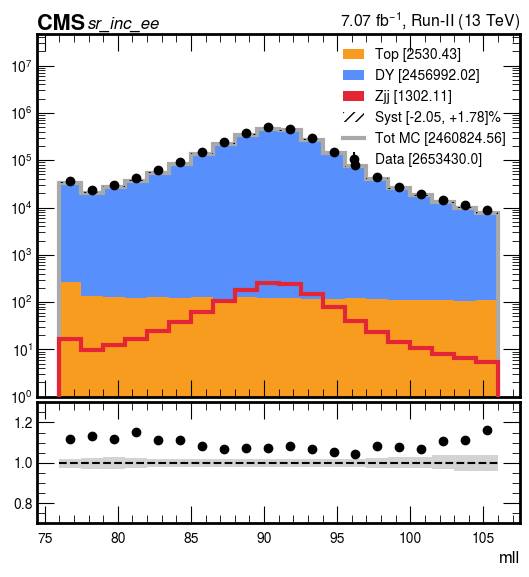

In [19]:
plot(histos, 'sr_inc_ee', 'mll')

[0.00666567 0.00830424 0.00739213 0.00637501 0.00561463 0.00457063
 0.00370499 0.00276389 0.00197687 0.00150548 0.00152154 0.00203801
 0.00304368 0.00428794 0.00571184 0.00720015 0.00834325 0.01004418
 0.01151436 0.01228233]


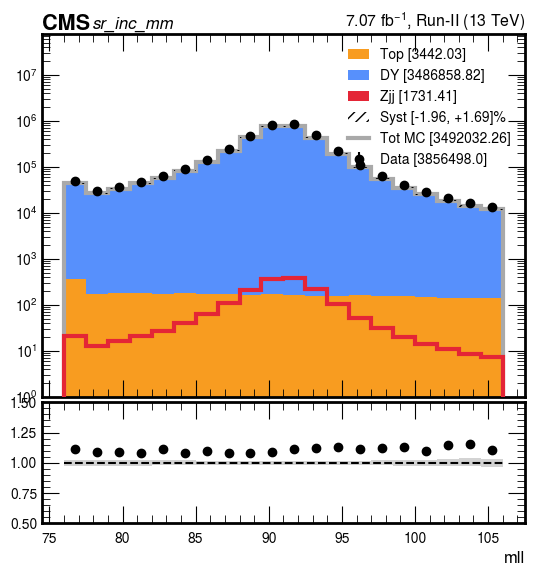

In [12]:
#plot(histos, 'sr_mm', 'detajj')
plot(histos, 'sr_inc_mm', 'mll')

[0.0130588  0.0176325  0.01503617 0.01270373 0.00965398 0.00824904
 0.00609541 0.00470141 0.00393065 0.00332667 0.00348024 0.00431735
 0.00612069 0.00855081 0.01110393 0.01383518 0.01567182 0.02013076
 0.02259691 0.0240141 ]


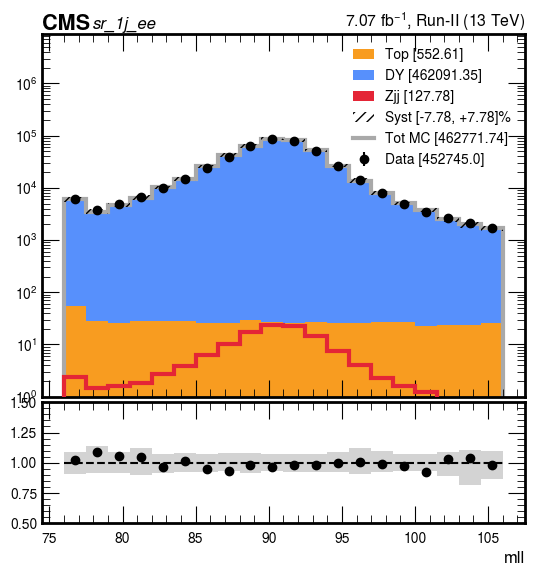

In [15]:
plot(histos, 'sr_1j_ee', 'mll')

[0.01582434 0.01951911 0.01798562 0.01513265 0.01342179 0.01026509
 0.00835456 0.00628239 0.00442231 0.00338407 0.00346611 0.0045423
 0.00679752 0.00927737 0.01313976 0.01682423 0.01790469 0.02049301
 0.0276817  0.02807483]


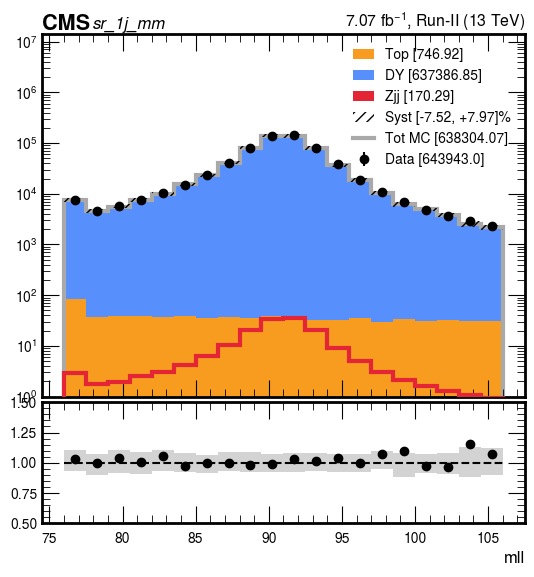

In [14]:
plot(histos, 'sr_1j_mm', 'mll')

[ 0.          0.         30.75092766  0.          0.84268804  1.22430809
  0.30531899  0.11310661  0.07815868  0.07720139  0.04655133  0.05126028
  0.05138108  0.05578704  0.06569865  0.06572799  0.05773155  0.05233955
  0.05419527  0.0550566   0.05918129  0.0773645   0.10560683  0.41035336
  0.32180808  0.61363629  0.          0.          0.          0.        ]


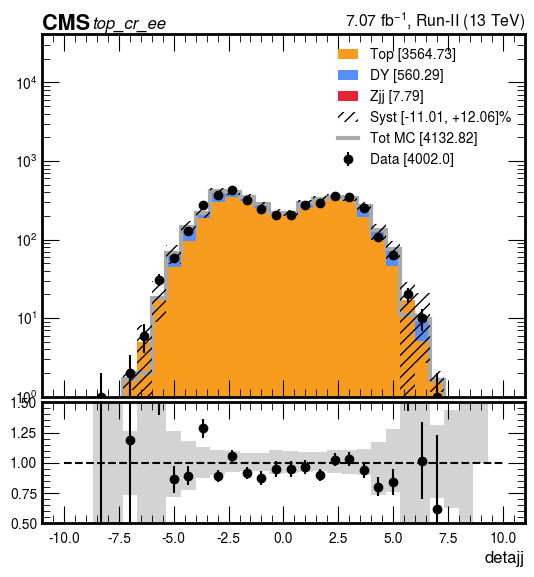

In [95]:
plot(histos, 'top_cr_ee', 'detajj')

[0.         0.         0.         0.         0.         0.76152309
 0.64485664 0.19853043 0.1480875  0.10231202 0.07124163 0.06119912
 0.0708122  0.06754252 0.08775844 0.07699213 0.07227395 0.06588355
 0.06206593 0.07344757 0.09515104 0.10836848 0.18645033 0.77272824
 0.63232109 0.42947789 2.79525132 0.         0.         0.        ]


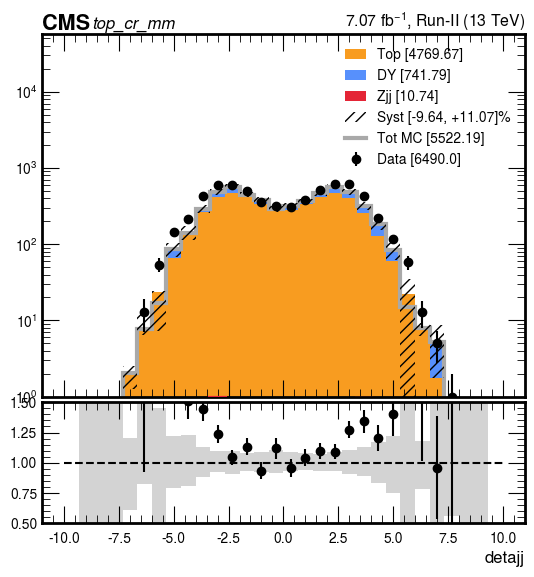

In [96]:
plot(histos, 'top_cr_mm', 'detajj')